# **Step1: Import packages**

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os

print("Packages imported!")
print ("tensorflow version: ",tf.__version__)
print("is using gpu: ", len(tf.config.list_physical_devices('GPU')) > 0)


Packages imported!
tensorflow version:  2.17.1
is using gpu:  True


# **Step2: Load Data**

In [4]:
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)  # 10 classes in CIFAR-10
y_test = to_categorical(y_test, 10)

# Define the class names for CIFAR-10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Data loaded!")

Data loaded!


# **Step3: Display Data**

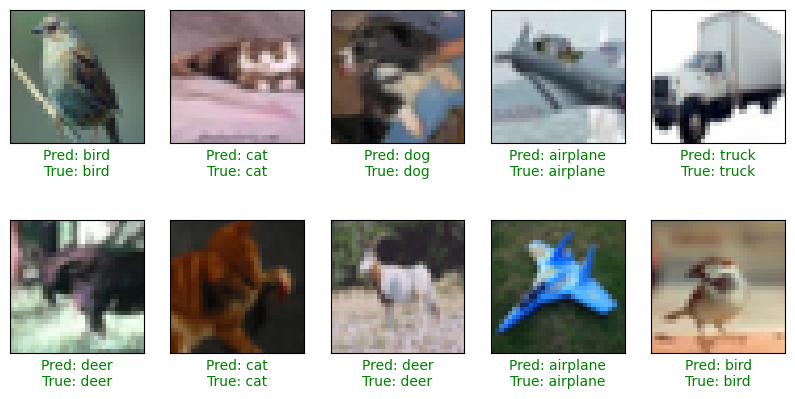

In [5]:
# Function to show random examples with true and predicted labels
def show_random_examples(x, y, p):
    indices = np.random.choice(len(x), size=10, replace=False)

    x = x[indices]
    y = y[indices]
    p = p[indices]

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(f"Pred: {classes[np.argmax(p[i])]}\nTrue: {classes[np.argmax(y[i])]}", color=col)
    plt.show()

# Show random examples with true labels
show_random_examples(x_train, y_train, y_train)

# **Step3: Build Models**

In [6]:
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dropout, Input
from tensorflow.keras.optimizers import Adam, Nadam
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint

print("Packages imported!")

Packages imported!


### Model 1: Bad Model, 50% accuracy & Overfitting

In [13]:
## Create the model
# Defining the model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten input for CNN input shape (32x32x3)
    layers.Dense(3000, activation='relu'),    # Dense hidden layer with 3000 neurons
    layers.Dense(1000, activation='relu'),    # Dense hidden layer with 1000 neurons
    layers.Dense(10, activation='softmax')    # Output layer with 10 neurons for classification
])
# Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

##### *Trainning Model 1*

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2962 - loss: 1.9490 - val_accuracy: 0.3976 - val_loss: 1.7269
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4136 - loss: 1.6679 - val_accuracy: 0.4171 - val_loss: 1.6536
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4445 - loss: 1.5776 - val_accuracy: 0.4416 - val_loss: 1.5827
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4635 - loss: 1.5197 - val_accuracy: 0.4413 - val_loss: 1.5733
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4836 - loss: 1.4658 - val_accuracy: 0.4754 - val_loss: 1.4885
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4991 - loss: 1.4217 - val_accuracy: 0.4846 - val_loss: 1.4885
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5159 - loss: 1.3801 - val_accuracy: 0.4935 - val_loss: 1.4425
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5312 - loss: 1.3412 - 

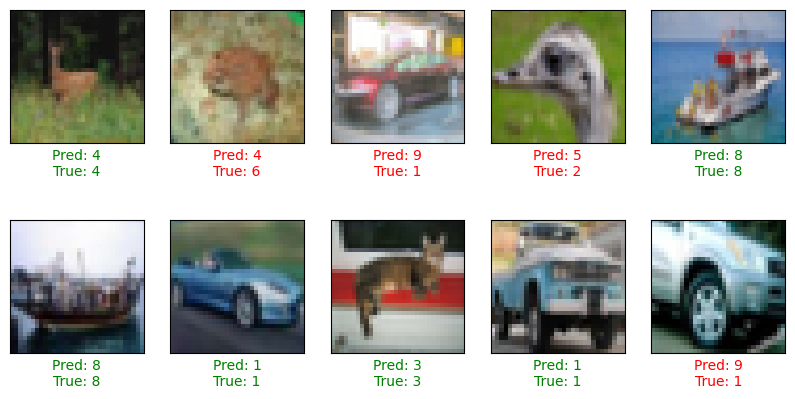

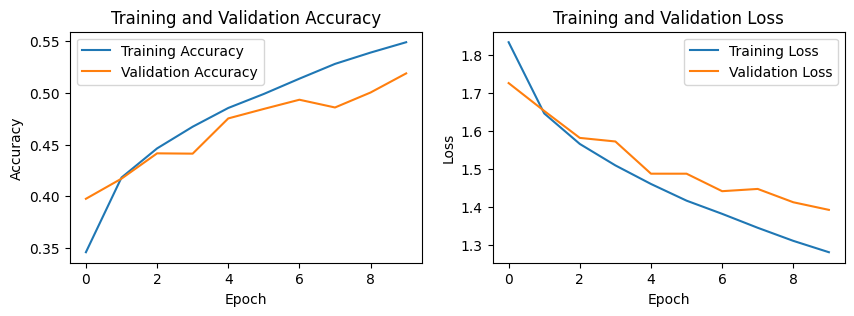

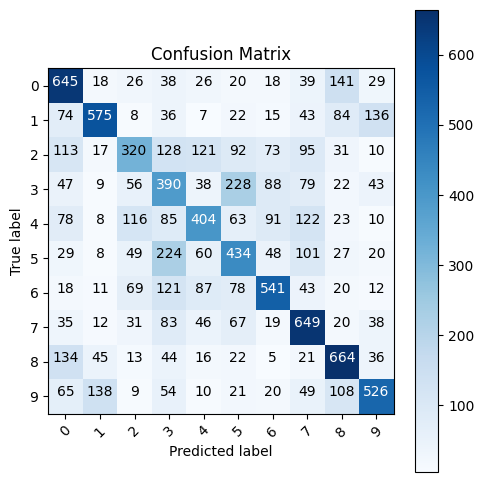

In [14]:
## Train the model
# Compiling the model
model.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
# Fiting the model with validation split (to monitor validation accuracy)
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Get the predictions (probabilities)
y_pred = model.predict(x_test)
# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert the true labels from one-hot encoding to class labels
y_test_classes = np.argmax(y_test, axis=1)
## Display Data
!nvidia-smi
# Show Classification Report
print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))
# Show predicted labels
show_random_examples(x_test, y_test, y_pred)
# Plot for training and validation accuracy
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot for training and validation loss as well
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Show Plots
plt.show()
# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
# Add labels for axes
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
# Add values to cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
# Show confusion matrix
plt.show()

## Model 2: Good Model, 81% accuracy, Well-Generalized + Early Stopping

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
# Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

##### *Trainning Model 2*

In [8]:
import json
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Define model checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max',
                             save_best_only=True, verbose=1)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

print("Model saved at:", os.path.abspath("best_model.keras"))
# Save the training history as a JSON file
with open('history.json', 'w') as f:
    json.dump(history.history, f)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.2929 - loss: 2.2567
Epoch 1: val_accuracy improved from -inf to 0.22470, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 117ms/step - accuracy: 0.2932 - loss: 2.2548 - val_accuracy: 0.2247 - val_loss: 2.4217
Epoch 2/20
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4903 - loss: 1.4237
Epoch 2: val_accuracy improved from 0.22470 to 0.55890, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.4904 - loss: 1.4234 - val_accuracy: 0.5589 - val_loss: 1.2466
Epoch 3/20
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5668 - loss: 1.2097
Epoch 3: val_accuracy improved from 0.55890 to 0.56250, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 94ms/step - accuracy: 0.5669 - loss: 1.2095 - val_accuracy: 0.5625 - val_loss: 1.3916
Epoch 4/20
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6221 - loss: 1.0669
Epoch 4: val_accuracy improved from 0.56

## Dispay Results


Model loaded successfully!
History loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Sun Dec  8 00:37:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              32W /  70W |   2213MiB / 15360MiB |      0%      Default |
|                                         |                  

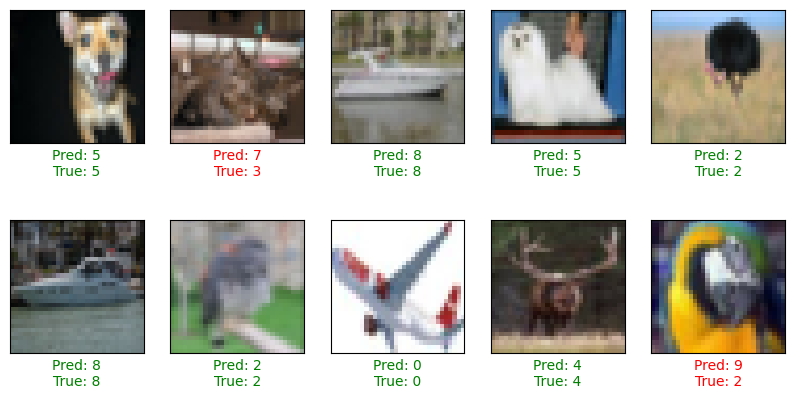

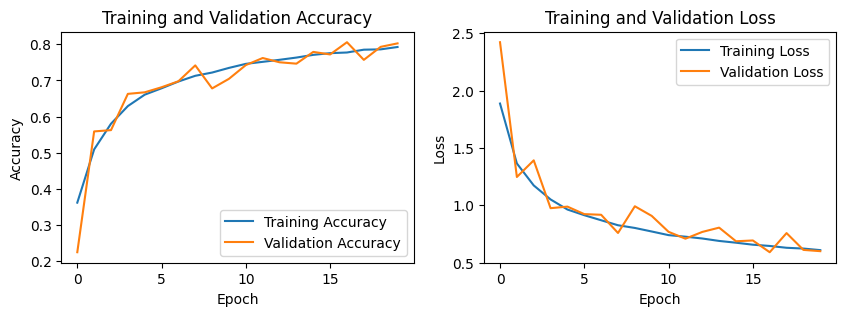

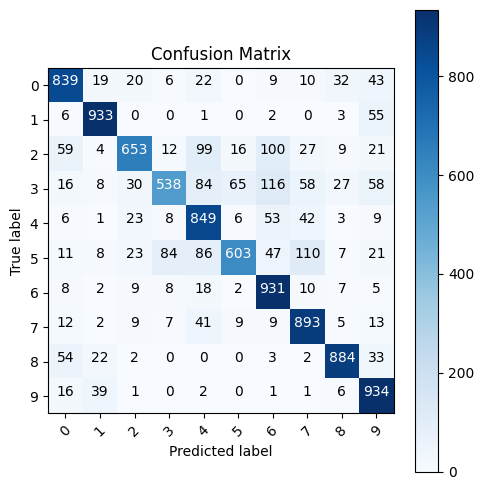

In [15]:
from tensorflow.keras.models import load_model
## Load Data
model = load_model("best_model.keras")
print("Model loaded successfully!")
# Load the history from the saved JSON file
with open('history.json', 'r') as f:
    history_data = json.load(f)
print("History loaded successfully!")

# Get the predictions (probabilities)
y_pred = model.predict(x_test)
# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert the true labels from one-hot encoding to class labels
y_test_classes = np.argmax(y_test, axis=1)
## Display Data
!nvidia-smi
# Show Classification Report
print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))
# Show predicted labels
show_random_examples(x_test, y_test, y_pred)
# Plot for training and validation accuracy
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot for training and validation loss as well
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Show Plots
plt.show()
# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
# Add labels for axes
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
# Add values to cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
# Show confusion matrix
plt.show()